In [2]:
! pip install --upgrade pip

Requirement already up-to-date: pip in ./anaconda3/lib/python3.7/site-packages (20.2.4)


In [3]:
!pip install mlxtend

In [60]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
traindf = pd.read_csv("loan_prediction_train.csv")
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [3]:
traindf.describe(include = 'all')

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,614,601,611,599,614,582,614.000000,614.000000,592.000000,600.00000,564.000000,614,614
unique,614,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3,2
top,LP001116,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Semiurban,Y
freq,1,489,398,345,480,500,NaN,NaN,NaN,NaN,NaN,233,422
mean,NaN,NaN,NaN,NaN,NaN,NaN,5403.459283,1621.245798,146.412162,342.00000,0.842199,NaN,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,6109.041673,2926.248369,85.587325,65.12041,0.364878,NaN,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,150.000000,0.000000,9.000000,12.00000,0.000000,NaN,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2877.500000,0.000000,100.000000,360.00000,1.000000,NaN,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3812.500000,1188.500000,128.000000,360.00000,1.000000,NaN,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5795.000000,2297.250000,168.000000,360.00000,1.000000,NaN,NaN


In [62]:
testdf = pd.read_csv("loan_prediction_test.csv")
testdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [63]:
testdf.describe(include = "all")

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,367,356,367,357,367,344,367.000000,367.000000,362.000000,361.000000,338.000000,367
unique,367,2,2,4,2,2,NaN,NaN,NaN,NaN,NaN,3
top,LP002735,Male,Yes,0,Graduate,No,NaN,NaN,NaN,NaN,NaN,Urban
freq,1,286,233,200,283,307,NaN,NaN,NaN,NaN,NaN,140
mean,NaN,NaN,NaN,NaN,NaN,NaN,4805.599455,1569.577657,136.132597,342.537396,0.825444,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,4910.685399,2334.232099,61.366652,65.156643,0.380150,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,28.000000,6.000000,0.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,2864.000000,0.000000,100.250000,360.000000,1.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,3786.000000,1025.000000,125.000000,360.000000,1.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,5060.000000,2430.500000,158.000000,360.000000,1.000000,NaN


## Exploratory Data Analysis

### 1. Gender, Married, Education, Self_Employed against Loan_Status

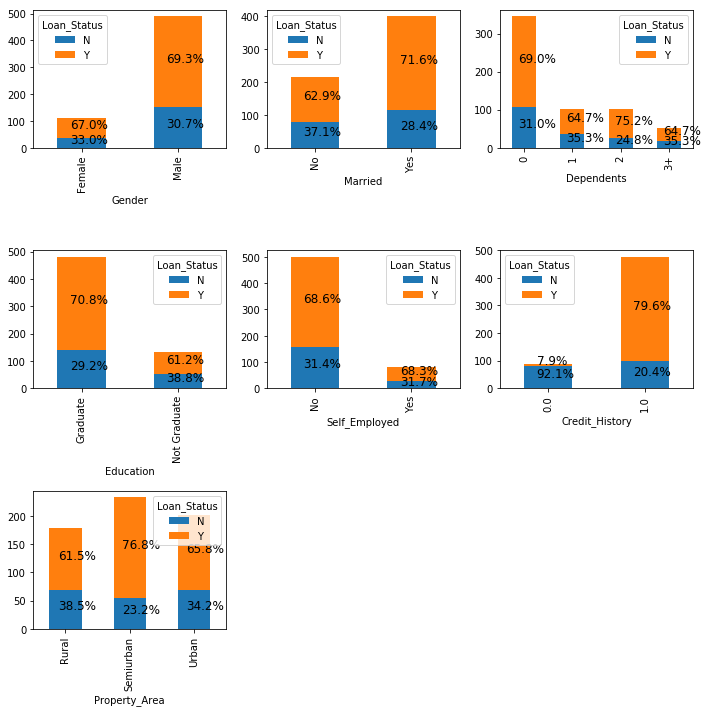

In [9]:
fig = plt.figure()
Cat = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']
for col,num in zip(Cat, range(1,8)):
    ax = fig.add_subplot(3,3,num)
    tb = pd.crosstab(traindf[col], traindf['Loan_Status'])
    percent = tb.div(tb.sum(1).astype(float), axis = 0)
    values = list(percent['N']) + list(percent['Y'])
    kx = -0.12
    tb.plot(kind = "bar", stacked = True, figsize = (10,10), ax = ax)
    for i, p in enumerate(ax.patches):
        ax.text(p.get_xy()[0] + p.get_width()/2 + kx,
                p.get_xy()[1] + p.get_height()/2,
                '{:.1%}'.format(values[i]), fontsize = 12)
plt.tight_layout()
plt.show()

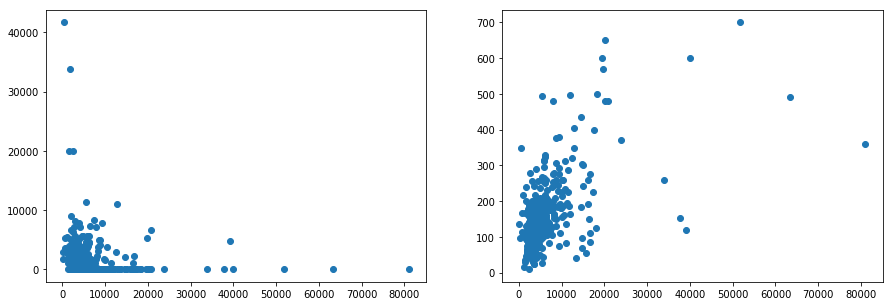

In [10]:
plt.figure(figsize = (15,5))
plt.subplot(121)
plt.scatter(traindf['ApplicantIncome'], traindf['CoapplicantIncome'])
plt.subplot(122)
plt.scatter(traindf['ApplicantIncome'], traindf['LoanAmount'])

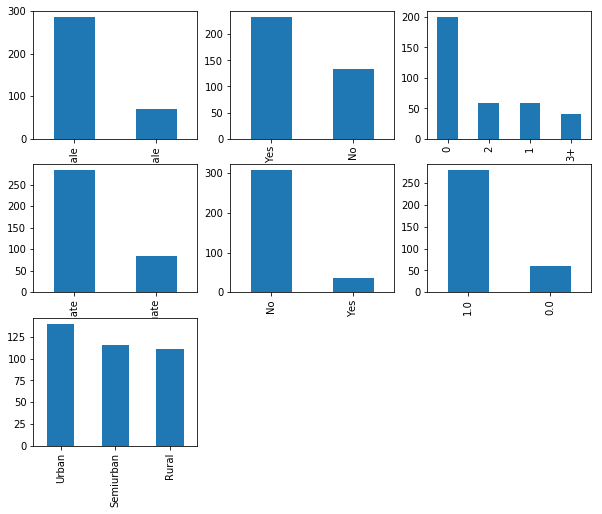

In [11]:
fig = plt.figure()
for col,num in zip(list(['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']),
                   range(1,8)):
    table = testdf[col].value_counts()
    ax = fig.add_subplot(3,3,num)
    table.plot(kind = 'bar', ax = ax, figsize = (10,8))


## Checking missing values in each column

In [6]:
missing_data = traindf.isnull()
missing_data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False


In [7]:
for column in missing_data.columns.values.tolist():
    counts =  missing_data[column].value_counts()
    if counts[0] != 614:
        print("{} missing values in {} of type {}".format(counts[1], column, traindf.dtypes[column]))

13 missing values in Gender of type object
3 missing values in Married of type object
15 missing values in Dependents of type object
32 missing values in Self_Employed of type object
22 missing values in LoanAmount of type float64
14 missing values in Loan_Amount_Term of type float64
50 missing values in Credit_History of type float64


In [8]:
for column in testdf.isnull().columns.values.tolist():
    if testdf.isnull()[column].value_counts()[0] != 367:
        print("{} missing values in {} of type {}".format(testdf.isnull()[column].value_counts()[1], column, testdf.dtypes[column]))

11 missing values in Gender of type object
10 missing values in Dependents of type object
23 missing values in Self_Employed of type object
5 missing values in LoanAmount of type float64
6 missing values in Loan_Amount_Term of type float64
29 missing values in Credit_History of type float64


### Replace missing values with the mode for categorical columns

In [64]:
traindf['Gender'].replace(np.nan, traindf['Gender'].mode()[0], inplace = True)
traindf['Married'].replace(np.nan, traindf['Married'].mode()[0], inplace = True)
traindf['Dependents'].replace(np.nan, traindf['Dependents'].mode()[0], inplace = True)
traindf['Self_Employed'].replace(np.nan, traindf['Self_Employed'].mode()[0], inplace = True)
traindf['Credit_History'].replace(np.nan, traindf['Credit_History'].mode()[0], inplace = True)
traindf['LoanAmount'].replace(np.nan, traindf['LoanAmount'].median(), inplace = True)
traindf['Loan_Amount_Term'].replace(np.nan, traindf['Credit_History'].median(), inplace = True)

In [65]:
testdf['Gender'].replace(np.nan, testdf['Gender'].mode()[0], inplace = True)
testdf['Dependents'].replace(np.nan, testdf['Dependents'].mode()[0], inplace = True)
testdf['Self_Employed'].replace(np.nan, testdf['Self_Employed'].mode()[0], inplace = True)
testdf['Credit_History'].replace(np.nan, testdf['Credit_History'].mode()[0], inplace = True)
testdf['LoanAmount'].replace(np.nan, testdf['LoanAmount'].median(), inplace = True)
testdf['Loan_Amount_Term'].replace(np.nan, testdf['Credit_History'].median(), inplace = True)

In [66]:
traindf.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
Loan_Status          False
dtype: bool

In [67]:
testdf.isnull().any()

Loan_ID              False
Gender               False
Married              False
Dependents           False
Education            False
Self_Employed        False
ApplicantIncome      False
CoapplicantIncome    False
LoanAmount           False
Loan_Amount_Term     False
Credit_History       False
Property_Area        False
dtype: bool

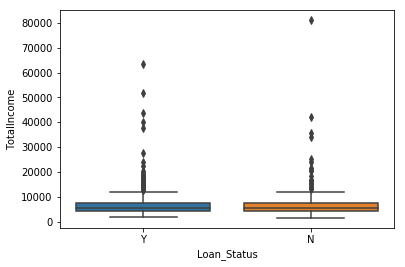

In [68]:
traindf['TotalIncome'] = traindf['ApplicantIncome'] + traindf['CoapplicantIncome']
sns.boxplot(x = 'Loan_Status', y = 'TotalIncome', data = traindf)

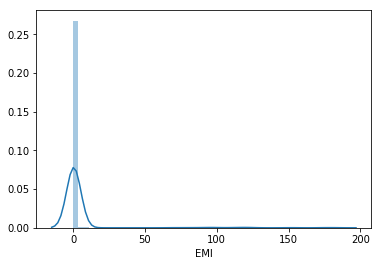

In [69]:
traindf['EMI'] = traindf['LoanAmount']/traindf['Loan_Amount_Term']
sns.distplot(traindf['EMI'])

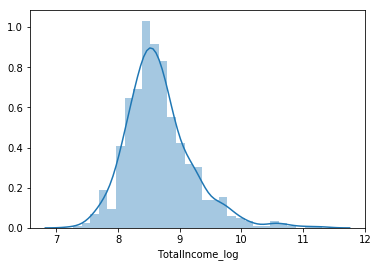

In [70]:
traindf['TotalIncome_log'] = np.log(traindf['TotalIncome'])
sns.distplot(traindf['TotalIncome_log'])

In [71]:
traindf['ApplicantIncome_log'] = np.log(traindf['ApplicantIncome'])
traindf['LoanAmount_log'] = np.log(traindf['LoanAmount'])
traindf['CoIncome_z'] = (traindf['CoapplicantIncome'] -traindf['CoapplicantIncome'].mean()) /traindf['CoapplicantIncome'].std()

In [72]:
X_data = pd.get_dummies(traindf.drop(['Loan_ID','Loan_Status'], axis = 1), drop_first = True)
def printall(X, max_rows = 10):
    from IPython.display import display, HTML
    display(HTML(X.to_html(max_rows = max_rows)))

printall(X_data)

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,EMI,TotalIncome_log,ApplicantIncome_log,LoanAmount_log,CoIncome_z,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5849,0.0,128.0,360.0,1.0,5849.0,0.355556,8.674026,8.674026,4.852030,-0.554036,1,0,0,0,0,0,0,0,1
1,4583,1508.0,128.0,360.0,1.0,6091.0,0.355556,8.714568,8.430109,4.852030,-0.038700,1,1,1,0,0,0,0,0,0
2,3000,0.0,66.0,360.0,1.0,3000.0,0.183333,8.006368,8.006368,4.189655,-0.554036,1,1,0,0,0,0,1,0,1
3,2583,2358.0,120.0,360.0,1.0,4941.0,0.333333,8.505323,7.856707,4.787492,0.251774,1,1,0,0,0,1,0,0,1
4,6000,0.0,141.0,360.0,1.0,6000.0,0.391667,8.699515,8.699515,4.948760,-0.554036,1,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,2900,0.0,71.0,360.0,1.0,2900.0,0.197222,7.972466,7.972466,4.262680,-0.554036,0,0,0,0,0,0,0,0,0
610,4106,0.0,40.0,180.0,1.0,4106.0,0.222222,8.320205,8.320205,3.688879,-0.554036,1,1,0,0,1,0,0,0,0
611,8072,240.0,253.0,360.0,1.0,8312.0,0.702778,9.025456,8.996157,5.533389,-0.472019,1,1,1,0,0,0,0,0,1
612,7583,0.0,187.0,360.0,1.0,7583.0,0.519444,8.933664,8.933664,5.231109,-0.554036,1,1,0,1,0,0,0,0,1


In [73]:
traindf['Loan_Status'] = np.where(traindf['Loan_Status'] == "Y", 1, 0)
traindf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome,EMI,TotalIncome_log,ApplicantIncome_log,LoanAmount_log,CoIncome_z
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,1,5849.0,0.355556,8.674026,8.674026,4.852030,-0.554036
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,0.355556,8.714568,8.430109,4.852030,-0.038700
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,0.183333,8.006368,8.006368,4.189655,-0.554036
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,0.333333,8.505323,7.856707,4.787492,0.251774
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,0.391667,8.699515,8.699515,4.948760,-0.554036


In [74]:
y_data = traindf['Loan_Status']
y_data.head()

0    1
1    0
2    1
3    1
4    1
Name: Loan_Status, dtype: int64

In [75]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,stratify = y_data, test_size = 0.2, random_state = 1)

In [76]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import roc_auc_score
model = RandomForestRegressor(100, n_jobs = -1, random_state = 42)
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=42)

In [77]:
yhat = model.predict(X_test)
roc_auc_score(y_test, yhat)

0.7936532507739938

In [78]:
model.feature_importances_

array([0.07056404, 0.03811571, 0.0611241 , 0.02254796, 0.27595524,
       0.06791369, 0.08695493, 0.07180876, 0.0715783 , 0.05948787,
       0.0439275 , 0.01114625, 0.02229164, 0.01694385, 0.00585293,
       0.00898376, 0.01616279, 0.01183084, 0.02354774, 0.0132621 ])

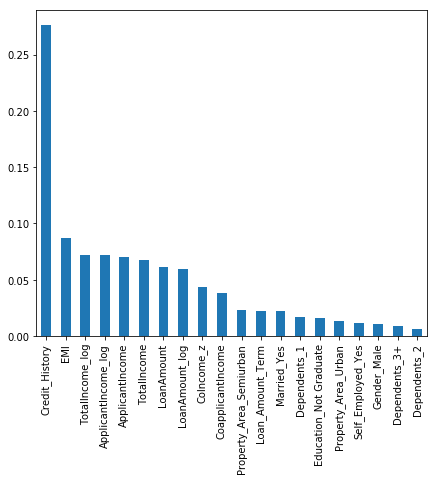

In [79]:
features = pd.Series(model.feature_importances_, index = X_data.columns)
features = features.sort_values(ascending = False)
features.plot(kind = "bar", figsize = (7,6))

In [80]:
from sklearn.model_selection import GridSearchCV
RandomForestRegressor().get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

In [ ]:
results = []
n_estimator_options = [10,30,50,70,90,110,150,200,500,1000, 2000]

for trees in n_estimator_options:
    model = RandomForestRegressor(trees, oob_score = True,n_jobs = -1, random_state = 42, warm_start = True).fit(X_train, y_train)
    yhat = model.predict(X_test)
    results.append(roc_auc_score(y_test, yhat))
pd.Series(results, n_estimator_options).plot()

In [82]:
results = []
max_features_options = ["auto",None, "sqrt","log2",0.9, 0.2]

for opt in max_features_options:
    model = RandomForestRegressor(n_estimators = 500, oob_score = True,n_jobs = -1, random_state = 42,max_features = opt)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    results.append(roc_auc_score(y_test, yhat))
results

[0.8159442724458205,
 0.8159442724458205,
 0.8323529411764705,
 0.8323529411764705,
 0.8246130030959752,
 0.8323529411764705]

In [86]:
results = []
min_samples_leaf_options = [1,2,3,4,5,6,7,8,9,10]

for opt in min_samples_leaf_options:
    model = RandomForestRegressor(n_estimators = 500, oob_score = True,n_jobs = -1, 
                                  random_state = 42,max_features = "sqrt", min_samples_leaf = opt)
    model.fit(X_train, y_train)
    yhat = model.predict(X_test)
    results.append(roc_auc_score(y_test, yhat))
results

[0.8323529411764705,
 0.8207430340557276,
 0.8210526315789475,
 0.8151702786377708,
 0.8222910216718267,
 0.8157894736842105,
 0.8130030959752321,
 0.8185758513931889,
 0.8080495356037152,
 0.8030959752321981]

### Logistic Regression

In [88]:
traindum = pd.get_dummies(traindf.drop(['Loan_ID','Loan_Status'], axis = 1), drop_first = True)

In [89]:
from sklearn import preprocessing
X = traindum[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','TotalIncome',
'TotalIncome_log',
 'ApplicantIncome_log',
 'Property_Area_Semiurban',
 'Property_Area_Urban']]
X_data = preprocessing.StandardScaler().fit(X).transform(X)

In [90]:
y_data = traindf['Loan_Status']

In [91]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,stratify = y_data, test_size = 0.2, random_state = 1)

In [92]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C = 0.01, solver='liblinear').fit(X_train, y_train)
yhat = LR_model.predict(X_test)

In [94]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import accuracy_score, f1_score
roc_auc_score(yhat, y_test)

0.9047619047619048

,Training Accuracy,Test Accuracy,Training F1,Test F1,Decision Threshold
0,0.761711,0.756098,0.851334,0.850000,0.1
1,0.808554,0.813008,0.875989,0.880829,0.2
2,0.806517,0.837398,0.874172,0.894737,0.3
3,0.806517,0.837398,0.874172,0.894737,0.4
4,0.804481,0.829268,0.872679,0.887701,0.5
5,0.810591,0.837398,0.875502,0.892473,0.6
6,0.790224,0.731707,0.846954,0.802395,0.7
7,0.606925,0.601626,0.640596,0.652482,0.8


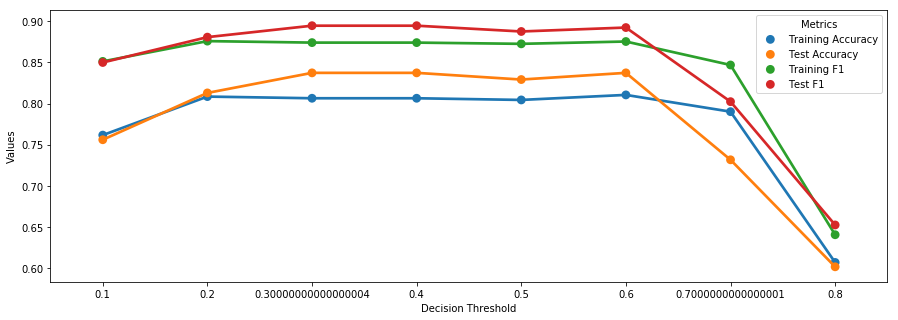

In [96]:
from sklearn.model_selection import cross_val_predict

train_accuracies = []
train_f1_scores = []
test_accuracies = []
test_f1_scores = []
thresholds = []

#for thresh in np.linspace(0.1,0.9,8): ## Sweeping from threshold of 0.1 to 0.9
for thresh in np.arange(0.1,0.9,0.1): ## Sweeping from threshold of 0.1 to 0.9
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train,y_train)
    
    y_pred_train_thresh = model.predict_proba(X_train)[:,1]
    y_pred_train = (y_pred_train_thresh > thresh).astype(int)

    train_acc = accuracy_score(y_train,y_pred_train)
    train_f1 = f1_score(y_train,y_pred_train)
    
    y_pred_test_thresh = model.predict_proba(X_test)[:,1]
    y_pred_test = (y_pred_test_thresh > thresh).astype(int) 
    
    test_acc = accuracy_score(y_test,y_pred_test)
    test_f1 = f1_score(y_test,y_pred_test)
    
    train_accuracies.append(train_acc)
    train_f1_scores.append(train_f1)
    test_accuracies.append(test_acc)
    test_f1_scores.append(test_f1)
    thresholds.append(thresh)
    
    
Threshold_logreg = {"Training Accuracy": train_accuracies, "Test Accuracy": test_accuracies, "Training F1": train_f1_scores, "Test F1":test_f1_scores, "Decision Threshold": thresholds }
Threshold_logreg_df = pd.DataFrame.from_dict(Threshold_logreg)

plot_df = Threshold_logreg_df.melt('Decision Threshold',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Decision Threshold", y="Values",hue="Metrics", data=plot_df,ax=ax)

Threshold_logreg_df
#plot_df.head()

In [99]:
thresh = 0.6 ### Threshold chosen from above Curves
y_pred_test_thresh = model.predict_proba(X_test)[:,1]
y_pred = (y_pred_test_thresh > thresh).astype(int) 
print("Test Accuracy: ",accuracy_score(y_test,y_pred))
print("Test F1 Score: ",f1_score(y_test,y_pred))


Test Accuracy:  0.8373983739837398
Test F1 Score:  0.8924731182795699


### Decision Tree

In [102]:
from sklearn.tree import DecisionTreeClassifier
Treemodel = DecisionTreeClassifier(criterion = "entropy", max_depth = 3)

from sklearn.model_selection import cross_val_predict, cross_val_score
Treemodel.fit(X_train, y_train)
y_pred = Treemodel.predict(X_test)


print("Accuracy score: ", accuracy_score(y_test,y_pred))
print("F1 Score ", f1_score(y_test,y_pred))



Accuracy score:  0.8373983739837398
F1 Score  0.8947368421052632


In [ ]:
DecisionTreeClassifier().get_params()

{'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': False,
 'random_state': None,
 'splitter': 'best'}

In [106]:
skf = StratifiedKFold(n_splits = 4)
parameter2 = [{'max_depth':[2,3,4,5,6]}]
TreeModel = DecisionTreeClassifier(criterion = 'entropy')
Grid2 = GridSearchCV(TreeModel, parameter2, cv = skf)

Grid2.fit(X_train, y_train)
BestGrid2 = Grid2.best_estimator_
yhat3 = BestGrid2.predict(X_test)
roc_auc_score(yhat3, y_test)

0.9047619047619048

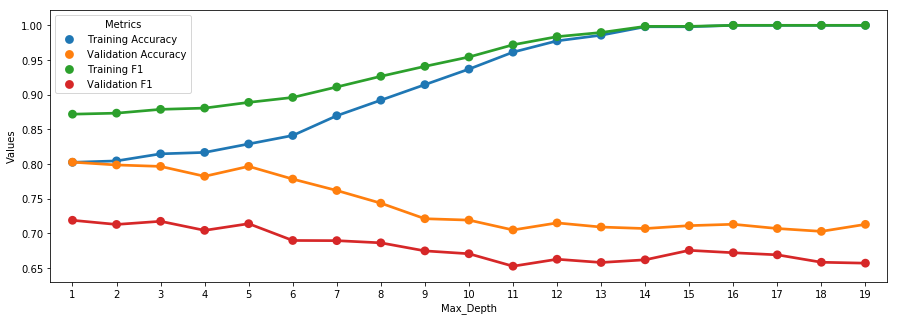

In [137]:
training_accuracy = []
val_accuracy = []
training_f1 = []
val_f1 = []
tree_depths = []

for depth in range(1,20):
    tree_clf = DecisionTreeClassifier(max_depth=depth)
    tree_clf.fit(X_train,y_train)
    y_training_pred = tree_clf.predict(X_train)

    training_acc = accuracy_score(y_train,y_training_pred)
    train_f1 = f1_score(y_train,y_training_pred)
    val_mean_f1 = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='f1_macro').mean()
    val_mean_accuracy = cross_val_score(tree_clf,X_train,y_train,cv=5,scoring='accuracy').mean()
    
    training_accuracy.append(training_acc)
    val_accuracy.append(val_mean_accuracy)
    training_f1.append(train_f1)
    val_f1.append(val_mean_f1)
    tree_depths.append(depth)
    

Tuning_Max_depth = {"Training Accuracy": training_accuracy, "Validation Accuracy": val_accuracy, "Training F1": training_f1, "Validation F1":val_f1, "Max_Depth": tree_depths }
Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

plot_df = Tuning_Max_depth_df.melt('Max_Depth',var_name='Metrics',value_name="Values")
fig,ax = plt.subplots(figsize=(15,5))
sns.pointplot(x="Max_Depth", y="Values",hue="Metrics", data=plot_df,ax=ax)

### Support Vector Machine

In [138]:
from sklearn import svm
SVM_model = svm.SVC(kernel = 'linear').fit(X_train, y_train)
yhat1 = SVM_model.predict(X_test)

In [139]:
from sklearn.metrics import jaccard_similarity_score
jaccard_similarity_score(y_test, yhat1)

0.8373983739837398

In [140]:
accuracy_score(yhat1, y_test)

0.8373983739837398

In [ ]:
svm.SVC().get_params()

{'C': 1.0,
 'cache_size': 200,
 'class_weight': None,
 'coef0': 0.0,
 'decision_function_shape': 'ovr',
 'degree': 3,
 'gamma': 'auto_deprecated',
 'kernel': 'rbf',
 'max_iter': -1,
 'probability': False,
 'random_state': None,
 'shrinking': True,
 'tol': 0.001,
 'verbose': False}

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits = 4)
parameter1 = [{'C':[0.01, 0.1, 1, 10, 100, 1000], 'kernel':['rbf', 'linear','sigmoid'],
              'gamma':[0.001, 0.0001]}]
SVMmodel = svm.SVC()
Grid1 = GridSearchCV(SVMmodel, parameter1, cv = skf)

In [ ]:
from sklearn.metrics import accuracy_score
Grid1.fit(X_train, y_train)
BestSVM = Grid1.best_estimator_
yhat = BestSVM.predict(X_test)
accuracy_score(y_test, yhat)

In [118]:
testdf = pd.read_csv('loan_prediction_test.csv')
testdf.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [120]:
testdf['Gender'].replace(np.nan, df['Gender'].mode()[0], inplace = True)
testdf['Married'].replace(np.nan, df['Married'].mode()[0], inplace = True)
testdf['Dependents'].replace(np.nan, df['Dependents'].mode()[0], inplace = True)
testdf['Self_Employed'].replace(np.nan, df['Self_Employed'].mode()[0], inplace = True)
testdf['LoanAmount'].replace(np.nan, df['LoanAmount'].mean(), inplace = True)
testdf['Loan_Amount_Term'].replace(np.nan, df['Loan_Amount_Term'].mean(), inplace = True)
testdf['Credit_History'].replace(np.nan, df['Credit_History'].mode()[0], inplace = True)

In [123]:
T = pd.get_dummies(testdf.drop('Loan_ID', axis = 1), drop_first = True)
T.head(10)



,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1
5,2165,3422,152.0,360.0,1.0,1,1,0,0,0,1,1,0,1
6,2226,0,59.0,360.0,1.0,0,0,1,0,0,1,0,1,0
7,3881,0,147.0,360.0,0.0,1,1,0,1,0,1,0,0,0
8,13633,0,280.0,240.0,1.0,1,1,0,1,0,0,0,0,1
9,2400,2400,123.0,360.0,1.0,1,0,0,0,0,1,0,1,0


In [124]:
T['TotalIncome'] = T['ApplicantIncome'] + T['CoapplicantIncome']
T['EMI'] = T['LoanAmount']/T['Loan_Amount_Term']
T['TotalIncome1'] = np.log(T['TotalIncome'])
T['EMI1'] = np.log(T['EMI'])
T["Balance_Income"] = T["TotalIncome1"]-T["EMI1"]*1000

In [125]:
T.head()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,TotalIncome,EMI,TotalIncome1,EMI1,Balance_Income
0,5720,0,110.0,360.0,1.0,1,1,0,0,0,0,0,0,1,5720,0.305556,8.651724,-1.185624,1194.275390
1,3076,1500,126.0,360.0,1.0,1,1,1,0,0,0,0,0,1,4576,0.350000,8.428581,-1.049822,1058.250705
2,5000,1800,208.0,360.0,1.0,1,1,0,1,0,0,0,0,1,6800,0.577778,8.824678,-0.548566,557.390630
3,2340,2546,100.0,360.0,1.0,1,1,0,1,0,0,0,0,1,4886,0.277778,8.494129,-1.280934,1289.427975
4,3276,0,78.0,360.0,1.0,1,0,0,0,0,1,0,0,1,3276,0.216667,8.094378,-1.529395,1537.489583


In [126]:

Test_X = preprocessing.StandardScaler().fit(T).transform(T)
Test_X[0:10]


/Users/roxanneli/anaconda3/lib/python3.7/site-packages/sklearn/preprocessing/data.py:625: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
/Users/roxanneli/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by StandardScaler.
  


array([[ 0.1864605 , -0.67333511, -0.43158622,  0.27073867,  0.4376739 ,
         0.48547939,  0.75835829, -0.43324619, -0.4376739 , -0.34974871,
        -0.5448117 , -0.33484506, -0.67981718,  1.27335328, -0.12618159,
        -0.15339171,  0.07253853, -0.40731836,  0.40753945],
       [-0.35269225, -0.02984821, -0.16875089,  0.27073867,  0.4376739 ,
         0.48547939,  0.75835829,  2.30815645, -0.4376739 , -0.34974871,
        -0.5448117 , -0.33484506, -0.67981718,  1.27335328, -0.34650636,
        -0.12148404, -0.39717115, -0.15503397,  0.15474308],
       [ 0.0396413 ,  0.09884917,  1.17828022,  0.27073867,  0.4376739 ,
         0.48547939,  0.75835829, -0.43324619,  2.28480611, -0.34974871,
        -0.5448117 , -0.33484506, -0.67981718,  1.27335328,  0.08181731,
         0.04204276,  0.43660049,  0.77617129, -0.77608508],
       [-0.50277411,  0.41887666, -0.59585831,  0.27073867,  0.4376739 ,
         0.48547939,  0.75835829, -0.43324619,  2.28480611, -0.34974871,
        -0.544

In [128]:
T.isnull().sum()

ApplicantIncome            0
CoapplicantIncome          0
LoanAmount                 0
Loan_Amount_Term           0
Credit_History             0
Gender_Male                0
Married_Yes                0
Dependents_1               0
Dependents_2               0
Dependents_3+              0
Education_Not Graduate     0
Self_Employed_Yes          0
Property_Area_Semiurban    0
Property_Area_Urban        0
TotalIncome                0
EMI                        0
TotalIncome1               0
EMI1                       0
Balance_Income             0
dtype: int64

In [129]:
y_predicted = model.predict(Test_X)
y_predicted[0:10]

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1], dtype=uint8)

In [130]:
Yhat = pd.DataFrame(y_predicted)
Yhat.head()

,0
0,1
1,1
2,1
3,1
4,1


In [131]:
final = pd.concat([testdf[['Loan_ID']], Yhat], axis = 1)
final.rename(columns = {0: 'Loan_Status'}, inplace = True)
final.head(10)

,Loan_ID,Loan_Status
0,LP001015,1
1,LP001022,1
2,LP001031,1
3,LP001035,1
4,LP001051,1
5,LP001054,1
6,LP001055,1
7,LP001056,0
8,LP001059,1
9,LP001067,1


In [ ]:
final.dtypes

In [132]:
final['Loan_Status'].replace(to_replace = [1,0], value = ['Y', 'N'], inplace = True)
final.head()

,Loan_ID,Loan_Status
0,LP001015,Y
1,LP001022,Y
2,LP001031,Y
3,LP001035,Y
4,LP001051,Y


In [133]:
final['Loan_Status'].value_counts()

Y    308
N     59
Name: Loan_Status, dtype: int64

In [134]:
final.to_csv('final_submission.csv', index = False)